In [ ]:
import numpy as np
import cv2
from sklearn.mixture import GaussianMixture as GMM
import glob

In [ ]:
img_list= glob.glob("/content/*.jpg")
img_list

['/content/Non-Cancerous111.jpg',
 '/content/Non-Cancerous106.jpg',
 '/content/Cancerous102.jpg',
 '/content/Cancerous103.jpg',
 '/content/Non-Cancerous107.jpg',
 '/content/Cancerous107.jpg',
 '/content/Non-Cancerous116.jpg',
 '/content/Cancerous104.jpg']

In [ ]:
my_li = []
for fil in glob.glob("/content/*.jpg"):
  a=cv2.imread(fil)
  my_li.append(a)
print(my_li)

[array([[[ 4,  4,  4],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 7,  7,  7],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 4,  4,  4]],

       [[ 1,  1,  1],
        [ 4,  4,  4],
        [ 0,  0,  0],
        ...,
        [15, 15, 15],
        [ 1,  1,  1],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 3,  3,  3],
        [16, 16, 16],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[14, 14, 14],
        [ 4,  4,  4],
        [ 2,  2,  2],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [16, 16, 16],
        ...,
        [ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8), array([[[ 4,  4,  4],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
img_2d=[]
for i in my_li:
  n=i.shape[-1]
  i2= i.reshape(-1,n)
  img_2d.append(i2)

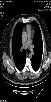

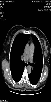

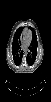

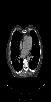

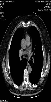

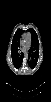

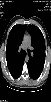

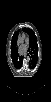

In [ ]:
from google.colab.patches import cv2_imshow
resized_img_list=[]
for i in my_li:
  i2=cv2.resize(i,None, fx=0.1, fy=.2)
  resized_img_list.append(i2)
for i in resized_img_list:
  cv2_imshow(i)

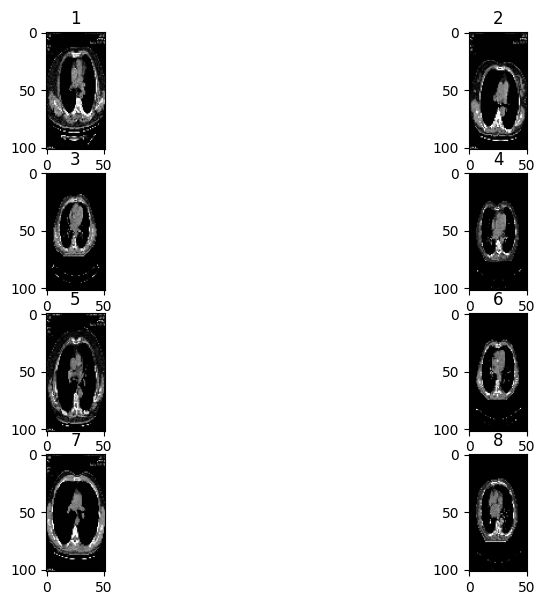

In [ ]:
row=4
col=2
fig = plt.figure(figsize=(10,7))
for i in range(len(resized_img_list)):
  j=resized_img_list[i]
  fig.add_subplot(row, col, i+1)
  plt.imshow(j)
  plt.title(i+1)

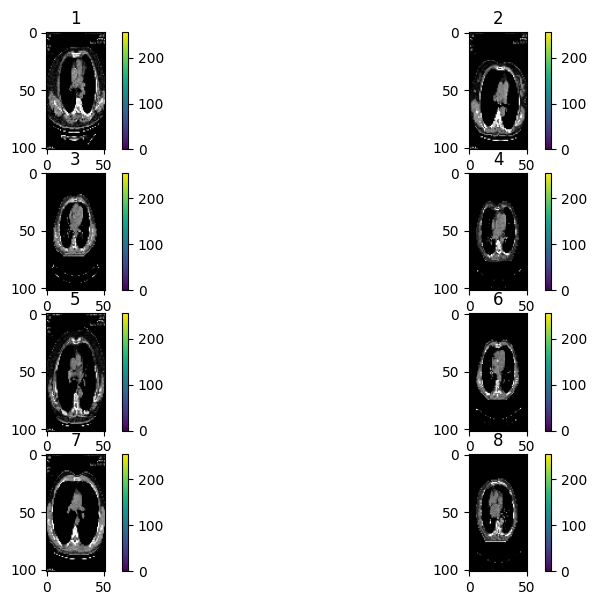

In [ ]:
row=4
col=2
fig = plt.figure(figsize=(10,7))
for i in range(len(resized_img_list)):
  j=resized_img_list[i]
  fig.add_subplot(row, col, i+1)
  plt.imshow(j)
  plt.title(i+1)
  plt.colorbar()

In [ ]:
img_d=[]
for i in resized_img_list:
  n=i.shape[-1]
  i2=i.reshape(-1,n)
  img_d.append(i2)

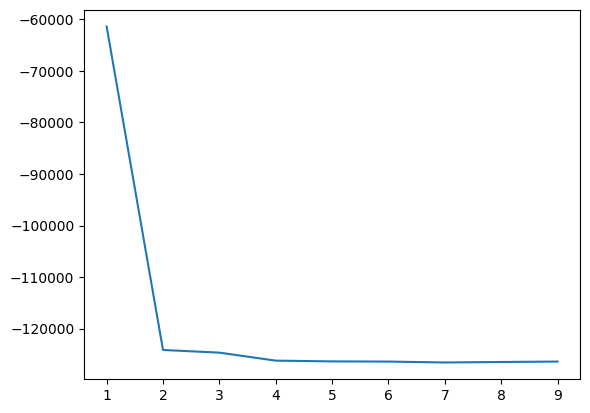

In [ ]:
training_img=img_d[1]
n_com = np.arange(1,10)
gmm_models = [GMM(n,covariance_type='full').fit(training_img) for n in n_com]
plt.plot(n_com,[m.bic(training_img) for m in gmm_models], label = 'BTC')

In [ ]:
gmm_model = GMM(n_components=5, covariance_type= 'tied').fit(training_img)
label=[]
for i in img_d:
  j=gmm_model.predict(i)
  label.append(j)

In [ ]:
len(label)

8

In [ ]:
org_shape=resized_img_list[0].shape
org_shape

(102, 51, 3)

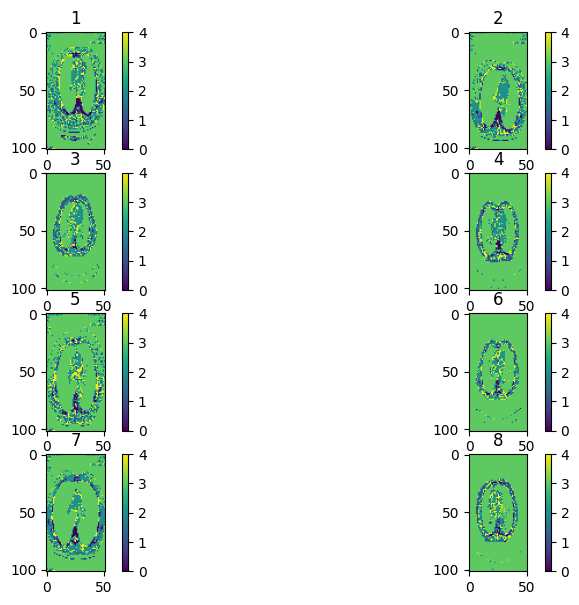

In [ ]:
row=4
col=2
fig = plt.figure(figsize=(10,7))
predicted_img=[]
for i in range(len(label)):
  org_shape= resized_img_list[0].shape
  segmented = label[i].reshape(org_shape[0],org_shape[1])
  predicted_img.append(segmented)
  fig.add_subplot(row, col, i+1)
  plt.imshow(segmented)
  plt.title(i+1)
  plt.colorbar()

In [ ]:
unique, count= np.unique(predicted_img[0], return_counts= True)
#Making list from the array
uni_li=list(unique)
count_li= list(count)
print(uni_li)
print(count_li)

[0, 1, 2, 3, 4]
[217, 448, 622, 3505, 410]


In [ ]:
#making dictionary from two list
dict_img=dict(zip(uni_li, count_li))
dict_img

{0: 217, 1: 448, 2: 622, 3: 3505, 4: 410}

In [ ]:
#checking whether the sample has yellow region
if dict_img[4] != 0:
  print('It has Cancer')
else:
  print('It is Healthy')

It has Cancer


In [ ]:
#making list dictionaries of every samle image's unique value and counts
li_dict_img=[]
for i in range(len(predicted_img)):
  unique, count=np.unique(predicted_img[i], return_counts = True)
  uni_li = list(unique)
  count_li= list(count)
  li_dict_img.append(dict(zip(uni_li, count_li)))
print(li_dict_img)

[{0: 217, 1: 448, 2: 622, 3: 3505, 4: 410}, {0: 194, 1: 283, 2: 574, 3: 3847, 4: 304}, {0: 80, 1: 244, 2: 510, 3: 4139, 4: 229}, {0: 73, 1: 384, 2: 255, 3: 4274, 4: 216}, {0: 152, 1: 417, 2: 426, 3: 3770, 4: 437}, {0: 91, 1: 153, 2: 381, 3: 4327, 4: 250}, {0: 201, 1: 221, 2: 759, 3: 3754, 4: 267}, {0: 89, 1: 332, 2: 291, 3: 4210, 4: 280}]


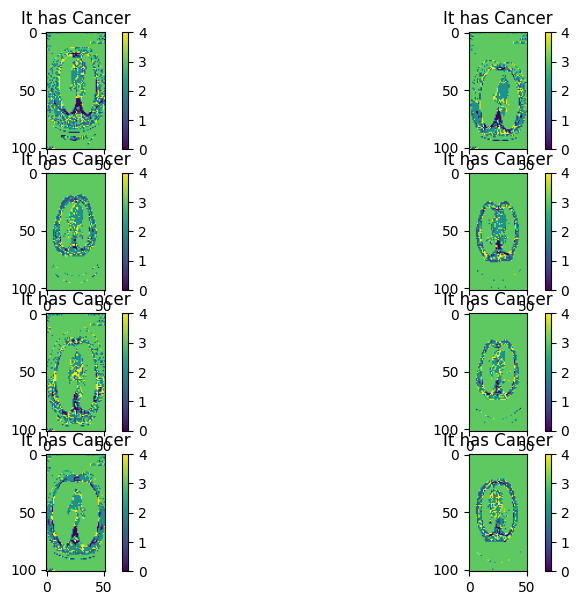

In [ ]:
row=4
col=2
fig = plt.figure(figsize=(10,7))
for (i,j) in zip(li_dict_img, range(len(predicted_img))):
  if i[4] !=0:
    a='It has Cancer'
  else:
    a='It is Healthy'
  fig.add_subplot(row,col,j+1)
  plt.imshow(predicted_img[j])
  plt.title(a)
  plt.colorbar()

(array([[ 2.,  0.,  6.,  0.,  0.,  4.,  0., 87.,  0.,  3.],
        [ 1.,  0.,  6.,  0.,  0.,  2.,  0., 89.,  0.,  4.],
        [ 0.,  0., 16.,  0.,  0.,  4.,  0., 80.,  0.,  2.],
        [ 2.,  0., 10.,  0.,  0., 13.,  0., 72.,  0.,  5.],
        [ 0.,  0.,  9.,  0.,  0.,  9.,  0., 75.,  0.,  9.],
        [ 1.,  0., 16.,  0.,  0., 13.,  0., 68.,  0.,  4.],
        [ 0.,  0.,  9.,  0.,  0., 10.,  0., 77.,  0.,  6.],
        [ 3.,  0.,  8.,  0.,  0., 12.,  0., 73.,  0.,  6.],
        [ 2.,  0., 11.,  0.,  0., 14.,  0., 72.,  0.,  3.],
        [ 2.,  0., 19.,  0.,  0., 14.,  0., 66.,  0.,  1.],
        [ 1.,  0.,  9.,  0.,  0., 27.,  0., 56.,  0.,  9.],
        [ 1.,  0.,  7.,  0.,  0., 15.,  0., 54.,  0., 25.],
        [ 2.,  0.,  9.,  0.,  0., 17.,  0., 67.,  0.,  7.],
        [ 3.,  0.,  9.,  0.,  0.,  3.,  0., 71.,  0., 16.],
        [ 2.,  0., 11.,  0.,  0.,  3.,  0., 77.,  0.,  9.],
        [ 5.,  0.,  9.,  0.,  0.,  2.,  0., 78.,  0.,  8.],
        [ 5.,  0.,  9.,  0.,  0.,  5.,  

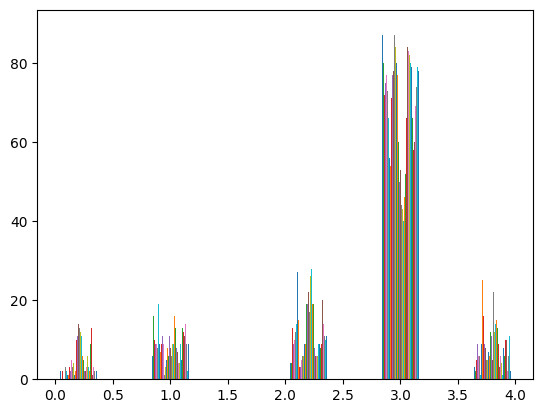

In [ ]:
t=predicted_img[0]
from skimage.measure import label, regionprops
regionprops(t)
plt.hist(t)